In [19]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
# Drop non-numeric columns which cannot be used in correlation calculation


file_path = 'dataset/cleaned_data.csv'

# Load the dataset
data_fillmean = pd.read_csv(file_path)
numeric_data = data_fillmean.select_dtypes(include=[np.number])
# Filter numerical columns
numerical_columns = data_fillmean.select_dtypes(include=['number']).columns
# Perform PCA
# Standardizing the features
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data)

# Applying PCA
pca = PCA(n_components=2)  # You can adjust the number of components
principal_components = pca.fit_transform(numeric_scaled)

# Creating a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the first few rows of the PCA DataFrame
print(pca_df.head())

   Principal Component 1  Principal Component 2
0              -1.676193              -0.618016
1              -0.446335              -0.699001
2               0.085288               0.634315
3              -0.061577               1.766983
4              -3.392229              -0.104938


Explained Variance Ratio: [0.261824   0.15109474]


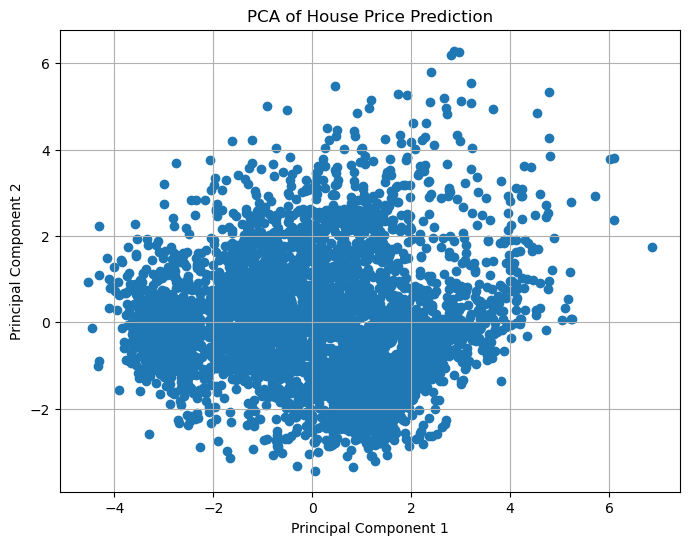

                             PC1       PC2
price                   0.281746  0.305293
bedrooms                0.272496  0.305536
bathrooms               0.479622  0.058935
sqft_living             0.430110  0.267010
floors                  0.323938 -0.272131
waterfront              0.017122  0.124672
view                    0.077143  0.293523
condition              -0.119979  0.260267
sqft_basement           0.090696  0.484636
yr_renovated           -0.205741  0.246480
house_age              -0.341915  0.342836
years_since_renovation -0.137982  0.219137
price_per_sqft         -0.145394  0.067551
bed_to_bath_ratio      -0.313240  0.171577


In [20]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of House Price Prediction')
plt.grid(True)
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=numeric_data.columns)
print(loadings)

In [22]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'data_fillmean' is already loaded and is your DataFrame
# Selecting the independent variables and the target variable
X = data_fillmean[['sqft_living', 'bathrooms', 'bedrooms','waterfront','view','condition', 'floors']]
y = data_fillmean['price']

# Adding a constant to the model (the intercept)
X = sm.add_constant(X)

# Fitting the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Viewing the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     434.9
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        23:00:25   Log-Likelihood:                -56927.
No. Observations:                4255   AIC:                         1.139e+05
Df Residuals:                    4247   BIC:                         1.139e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.409e+04   1.82e+04      0.774      

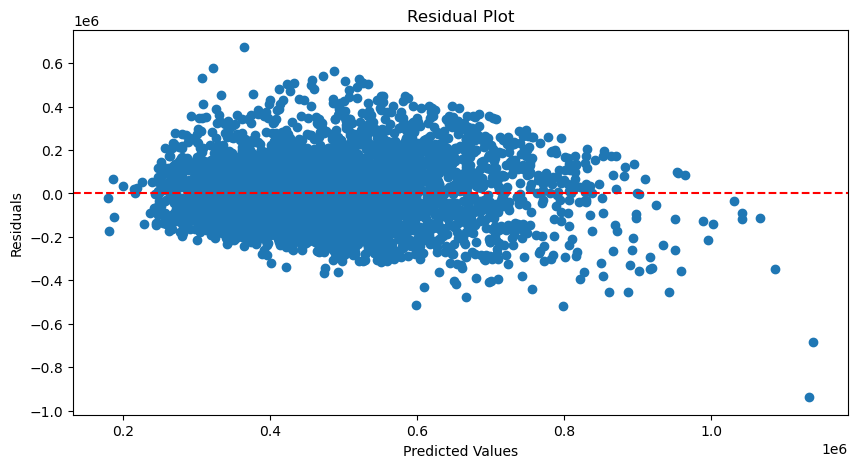

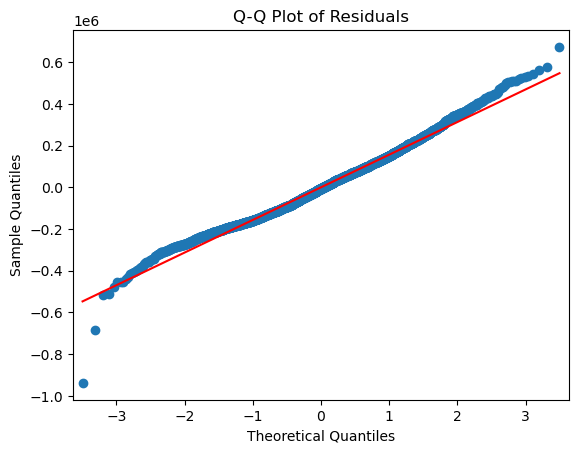

In [23]:
# Plotting residuals
plt.figure(figsize=(10, 5))
plt.scatter(model.predict(), model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q plot for normality
fig = sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

